In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'spam.csv'

# Try different encodings if the first one doesn't work
encodings = ['utf-8', 'ISO-8859-1', 'latin1', 'windows-1252']

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with {encoding} encoding")
        break
    except UnicodeDecodeError as e:
        print(f"Error with {encoding} encoding: {e}")

# Display the DataFrame (if successfully read)
if 'df' in locals():
    display(df)


Error with utf-8 encoding: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte
File successfully read with ISO-8859-1 encoding


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
file_path = 'spam.csv'

# Replace 'ISO-8859-1' with the appropriate encoding if known
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the DataFrame
display(df)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.rename(columns = {'v1': 'label', 'v2' : 'message'}, inplace = True)

In [11]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['label'])

In [14]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep = 'first')

In [17]:
df.value_counts('label')

label
0    4516
1     653
Name: count, dtype: int64

In [18]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['no_of_characters'] = df['message'].apply(lambda x : len(x))

C:\Users\parth\AppData\Local\Temp\ipykernel_14896\1951200418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_characters'] = df['message'].apply(lambda x : len(x))


In [20]:
df

,label,message,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [21]:
def convert(x):
    token = x.split(' ')
    return len(token)

In [22]:
df['no_of_words1'] = df['message'].apply(convert)

C:\Users\parth\AppData\Local\Temp\ipykernel_14896\3493930180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_words1'] = df['message'].apply(convert)


In [23]:
df['no_of_words2'] = df['message'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\parth\AppData\Local\Temp\ipykernel_14896\299218199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_words2'] = df['message'].apply(lambda x : len(nltk.word_tokenize(x)))


In [24]:
df

,label,message,no_of_characters,no_of_words1,no_of_words2
0,0,"Go until jurong point, crazy.. Available only ...",111,20,24
1,0,Ok lar... Joking wif u oni...,29,6,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,37
3,0,U dun say so early hor... U c already then say...,49,11,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,35
5568,0,Will Ì_ b going to esplanade fr home?,37,8,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,15
5570,0,The guy did some bitching but I acted like i'd...,125,26,27


In [25]:
df['no_of_sentences'] = df['message'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\parth\AppData\Local\Temp\ipykernel_14896\3763244342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_sentences'] = df['message'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [26]:
df

,label,message,no_of_characters,no_of_words1,no_of_words2,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,24,2
1,0,Ok lar... Joking wif u oni...,29,6,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,37,2
3,0,U dun say so early hor... U c already then say...,49,11,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,15,1
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,8,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,26,27,1


In [27]:
df.describe()

,label,no_of_characters,no_of_words1,no_of_words2,no_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,15.455988,18.455794,1.965564
std,0.332253,58.236293,11.163853,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000,1.000000
25%,0.000000,36.000000,7.000000,9.000000,1.000000
50%,0.000000,60.000000,12.000000,15.000000,1.000000
75%,0.000000,117.000000,22.000000,26.000000,2.000000
max,1.000000,910.000000,171.000000,220.000000,38.000000


In [28]:
df[df['label'] == 0][['no_of_characters','no_of_words2','no_of_sentences']].describe()

,no_of_characters,no_of_words2,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['label'] == 1][['no_of_characters','no_of_words2','no_of_sentences']].describe()

,no_of_characters,no_of_words2,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
df[df['label'] == 0]['no_of_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: no_of_characters, Length: 4516, dtype: int64

C:\Users\parth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\parth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='no_of_characters', ylabel='Count'>

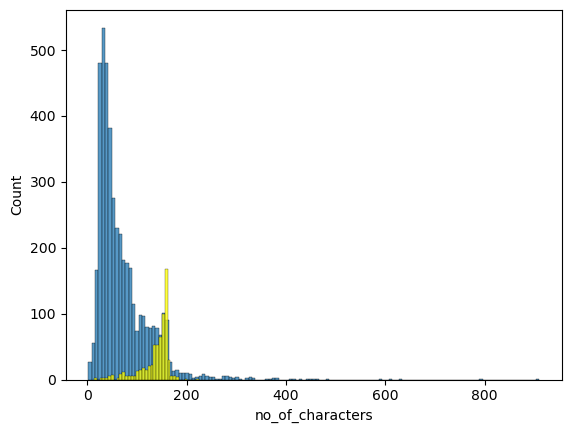

In [31]:
sns.histplot(df[df['label'] == 0]['no_of_characters'])
sns.histplot(df[df['label'] == 1]['no_of_characters'], color = 'yellow')

C:\Users\parth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\parth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\parth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 400x400 with 0 Axes>

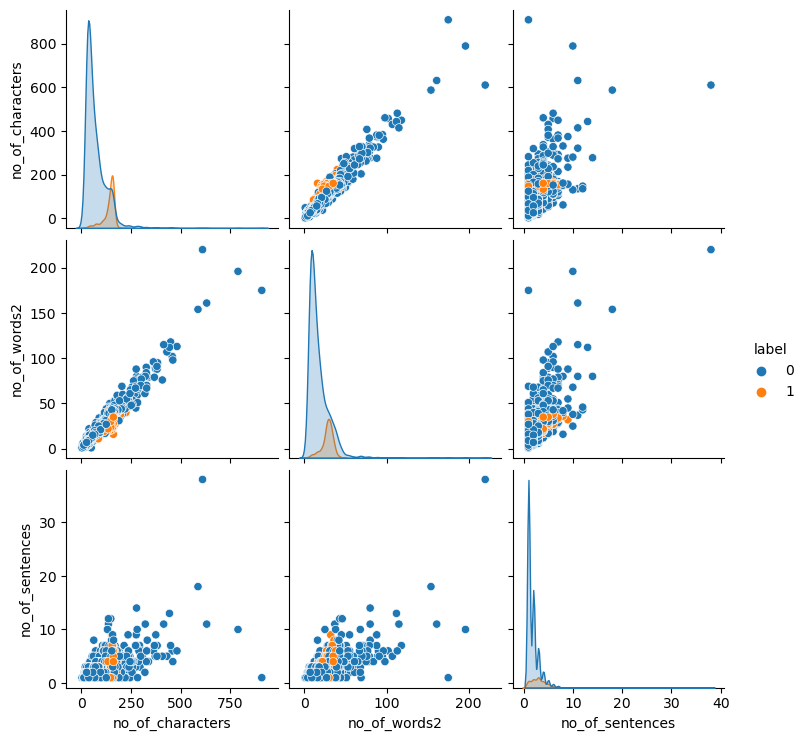

In [32]:
plt.figure(figsize = (4,4))
sns.pairplot(df[['label','no_of_characters', 'no_of_words2', 'no_of_sentences']], hue = 'label')

<Axes: >

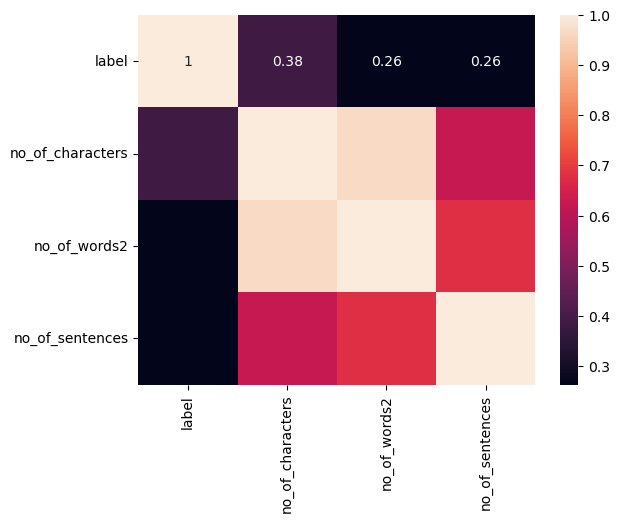

In [33]:
sns.heatmap(df[['label','no_of_characters', 'no_of_words2', 'no_of_sentences']].corr(), annot = True)

In [34]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('darkness')

'dark'

In [37]:
def transform_text(text):
    text  = text.lower()
    text = nltk.word_tokenize(text)

    new_text = []
    for i in text:
        if i.isalnum():
            new_text.append(i)

    text1 = new_text[:]
    new_text.clear()

    for i in text1:
        if i not in stopwords.words('english') and i not in string.punctuation:
            new_text.append(i)

    text1 = new_text[:]
    new_text.clear()

    for i in text1:
        new_text.append(ps.stem(i))
            
    return ' '.join(new_text) 

In [38]:
transform_text('Hello I am %% Parth, i am dancing,singing ,clapping ,enjoying myself in the darkness')

'hello parth danc sing clap enjoy dark'

In [39]:
df['transformed_text'] = df['message'].apply(transform_text)

C:\Users\parth\AppData\Local\Temp\ipykernel_14896\3273314684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['message'].apply(transform_text)


In [40]:
df

,label,message,no_of_characters,no_of_words1,no_of_words2,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,15,1,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,8,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,26,27,1,guy bitch act like interest buy someth els nex...


In [41]:
# !pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(height = 500, width = 500, background_color = 'white', min_font_size = 10)

In [42]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = ' '))

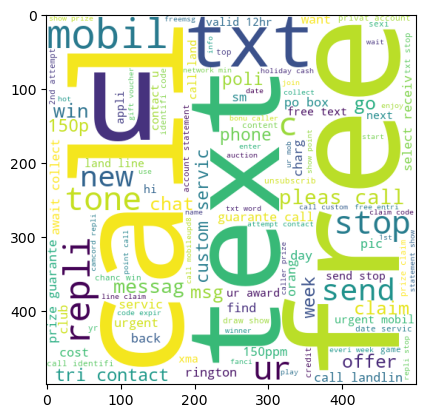

In [43]:
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep = ' '))

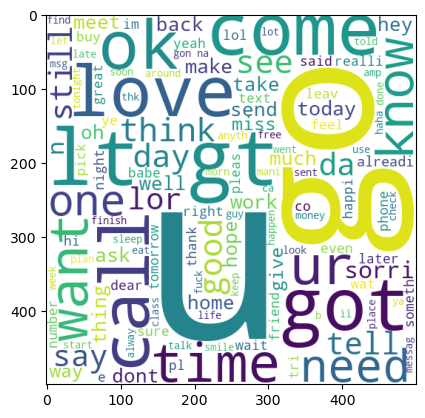

In [45]:
plt.imshow(ham_wc)

In [46]:
df[df['label'] == 1]['transformed_text'].tolist()


['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [47]:
spam = []

for message in df[df['label'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam.append(word)

In [48]:
spam

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [49]:
# !pip install Collection
from collections import Counter
Counter(spam)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [50]:
new_df = pd.DataFrame(Counter(spam).most_common(30))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

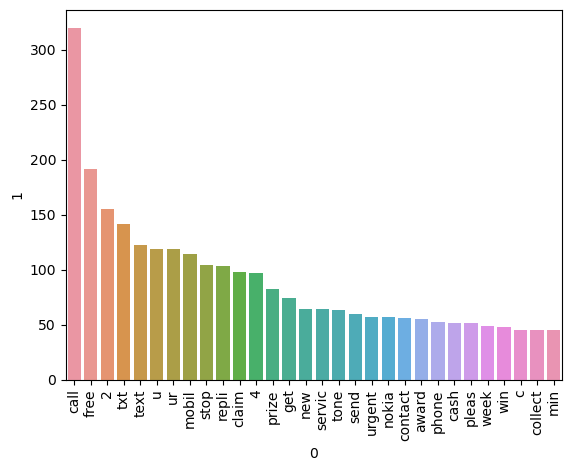

In [51]:
sns.barplot(x = new_df[0],y = new_df[1])
plt.xticks(rotation = 'vertical')

In [52]:
ham = []

for message in df[df['label'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham.append(word)
ham

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [53]:
from collections import Counter
Counter(ham)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

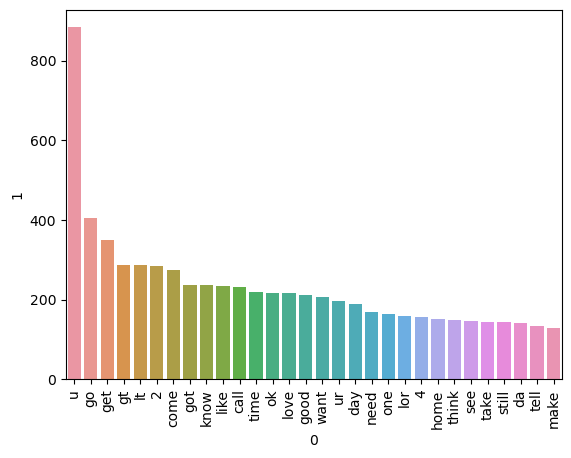

In [54]:
sns.barplot(x = pd.DataFrame(Counter(ham).most_common(30))[0], y = pd.DataFrame(Counter(ham).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [250]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

x = tfidf.fit_transform(df['transformed_text']).toarray()

In [251]:
x.shape

(5169, 6708)

In [254]:
y = df['label'].values

In [256]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [258]:
from sklearn.model_selection import train_test_split

In [260]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [261]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score

In [262]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [266]:
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(y_pred[0])
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))


0
0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [268]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(y_pred1[0])
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0
0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [269]:
bnb.fit(x_train,y_train)
y_pred2 = bnb.predict(x_test)
print(y_pred2[0])
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0
0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [271]:
mnb = MultinomialNB()
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)
dtc = DecisionTreeClassifier()

In [273]:
clfs = {
    'mnb' : mnb,
    'svc' : svc,
    'lr' : lr,
    'rfc': rfc,
    'xgb' : xgb,
    'dtc' : dtc
}

In [275]:
def classifier(clf, x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [281]:
classifier(lr,x_train,x_test,y_train,y_test)

(0.9516441005802708, 0.94)

In [283]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = classifier(clf,x_train,x_test,y_train,y_test)

    print('for', name)
    print('accuracy : ', current_accuracy)
    print("precision : ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for mnb
accuracy :  0.9593810444874274
precision :  1.0
for svc
accuracy :  0.9729206963249516
precision :  0.9741379310344828
for lr
accuracy :  0.9516441005802708
precision :  0.94
for rfc
accuracy :  0.971953578336557
precision :  1.0
for xgb
accuracy :  0.9729206963249516
precision :  0.9435483870967742
for dtc
accuracy :  0.9613152804642167
precision :  0.8656716417910447


In [284]:
score_df = pd.DataFrame({'Model':clfs.keys(), 'Accuracy score' : accuracy_scores, 'Precision Score' : precision_scores}).sort_values('Precision Score',ascending = False)
score_df

,Model,Accuracy score,Precision Score
0,mnb,0.959381,1.000000
3,rfc,0.971954,1.000000
1,svc,0.972921,0.974138
4,xgb,0.972921,0.943548
2,lr,0.951644,0.940000
5,dtc,0.961315,0.865672


In [285]:
performance_df = pd.melt(score_df, id_vars = 'Model')
performance_df

,Model,variable,value
0,mnb,Accuracy score,0.959381
1,rfc,Accuracy score,0.971954
2,svc,Accuracy score,0.972921
3,xgb,Accuracy score,0.972921
4,lr,Accuracy score,0.951644
5,dtc,Accuracy score,0.961315
6,mnb,Precision Score,1.000000
7,rfc,Precision Score,1.000000
8,svc,Precision Score,0.974138
9,xgb,Precision Score,0.943548


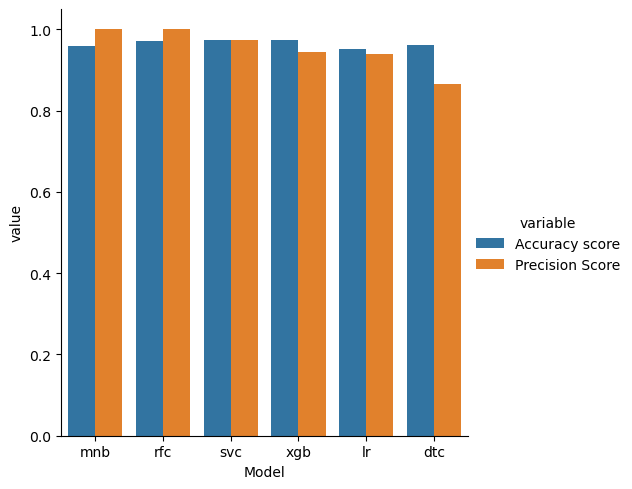

In [286]:
sns.catplot(x = 'Model', y = 'value', hue = 'variable', data = performance_df, kind = 'bar')

### Best Model is RandomForestClassifier